In [354]:
import numpy as np
import matplotlib.pyplot as plt

import figurefirst
import fly_plot_lib.plot as fpl
import fly_plot_lib.text as flytext
from IPython.display import display,SVG

In [266]:
# attraction is concentration dependent

def attraction_time_f(concentration):
    if concentration == 1.7/100.:
        return 2*60
    if concentration == 5/100.:
        return 2*60
    if concentration == 15/100.:
        return 0.5*60

In [363]:
aversion_time = 30*60
k = 0.08 # proportionality constant that determines probability of detecting CO2 each second

In [364]:
# This function determines the state of the agent based on its previous few states, and CO2 concentration

def propagate(state, co2, concentration):
    attraction_time = int(attraction_time_f(concentration))
    if co2:
        if int(state[-1]) == 0:
            if np.random.uniform(0,1) < k*concentration:
                state.append(1)
            else:
                state.append(0)
        elif int(state[-1]) == 1:
            if np.sum((state[-1*attraction_time:])) >= attraction_time:
                state.append(-1)
            else:
                state.append(1)
        elif int(state[-1]) == -1:
            if np.sum((state[-1*aversion_time:])) <= -1*aversion_time:
                state.append(0)
            else:
                state.append(-1)
    else:
        if int(state[-1]) == 0:
            state.append(0)
        elif int(state[-1]) == 1:
            if np.sum((state[-1*attraction_time:])) >= attraction_time:
                state.append(-1)
            else:
                state.append(0)
        elif int(state[-1]) == -1:
            if np.sum((state[-1*aversion_time:])) <= -1*aversion_time:
                state.append(0)
            else:
                state.append(-1)
    return state

In [365]:
def sim(concentration):
    
    # start with 10 min no odor (noise injected for plotting purposes)
    state = [np.random.uniform(-0.35,0.35) for i in range(10*60)]

    # 10 min of CO2 presentation
    for i in range(10*60):
        state = propagate(state, 1, concentration)

    # 10 min of clean air
    for i in range(10*60):
        state = propagate(state, 0, concentration)
    
    return state

In [366]:
# bootstrapping confidence intervals for plotting

def get_one_bootstrapped_mean(data):
    indices = np.random.randint(0, len(data), len(data))
    selection = [data[i] for i in indices]
    return np.mean(selection, axis=0)   

def get_95_confidence_intervals(data, iterations=100):
    bootstrapped_data = np.mean(data, axis=0)
    for iteration in range(iterations):
        bootstrapped_data = np.vstack( (bootstrapped_data, get_one_bootstrapped_mean(data)) )
    bootstrapped_data.sort(axis=0)
    
    index_hi = int(iterations*0.975)
    index_lo = int(iterations*0.025)
    
    return bootstrapped_data[index_lo, :], bootstrapped_data[index_hi, :]

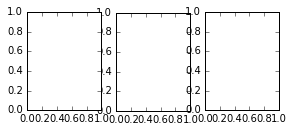

In [367]:
layout = figurefirst.svg_to_axes.FigureLayout('model.svg') 
layout.make_mplfigures()

In [368]:
# 5% CO2 case

concentration = 5/100.

states = [sim(concentration) for i in range(100)]
states = np.array(states)

ax = layout.axes['model', '5']

m = np.mean(states, axis=0)
x = np.arange(0,len(m),1)

lo, hi = get_95_confidence_intervals(states, iterations=100)
ax.fill_between(x, lo, hi, facecolor='white', 
                alpha=0.2, edgecolor='none', zorder=0)
ax.fill_between(x, lo, hi, facecolor=(0.001, 0.001, 0.001), 
                alpha=0.2, edgecolor='none', zorder=-1)

fpl.colorline(ax,   x, 
                    m, 
                    m,
                    cmap='seismic',
                    norm=[-0.7, 0.7],
                    zorder=1)

ax.set_ylim(-1, 1)
ax.set_xlim(0,1800)

ax.fill_between([600,1200], -1,1, facecolor='green', edgecolor='none', alpha=0.2, zorder=-10)

ax.set_rasterization_zorder(0)

figurefirst.mpl_functions.adjust_spines(ax, [], yticks=[-0.7, 0, 0.7], 
                                        spine_locations={'bottom': 5, 'bottom': 5}, linewidth=0.5)
ax.set_ylim(-1,1)

[[[  0.00000000e+00  -1.94200329e-02]
  [  1.00000000e+00   8.79754207e-03]]

 [[  1.00000000e+00   8.79754207e-03]
  [  2.00000000e+00  -8.82417149e-03]]

 [[  2.00000000e+00  -8.82417149e-03]
  [  3.00000000e+00  -2.37224470e-02]]

 ..., 
 [[  1.79600000e+03  -9.20000000e-01]
  [  1.79700000e+03  -9.20000000e-01]]

 [[  1.79700000e+03  -9.20000000e-01]
  [  1.79800000e+03  -9.20000000e-01]]

 [[  1.79800000e+03  -9.20000000e-01]
  [  1.79900000e+03  -9.20000000e-01]]]


(-1, 1)

In [369]:
#  1.7% CO2 case

concentration = 1.7/100.

states = [sim(concentration) for i in range(100)]
states = np.array(states)

ax = layout.axes['model', '1.7']

m = np.mean(states, axis=0)
x = np.arange(0,len(m),1)

lo, hi = get_95_confidence_intervals(states, iterations=100)
ax.fill_between(x, lo, hi, facecolor='white', 
                alpha=0.2, edgecolor='none', zorder=0)
ax.fill_between(x, lo, hi, facecolor=(0.001, 0.001, 0.001), 
                alpha=0.2, edgecolor='none', zorder=-1)

fpl.colorline(ax,   x, 
                    m, 
                    m,
                    cmap='seismic',
                    norm=[-0.7, 0.7],
                    zorder=1)

ax.set_ylim(-1, 1)
ax.set_xlim(0,1800)

ax.fill_between([600,1200], -1,1, facecolor='green', edgecolor='none', alpha=0.2, zorder=-10)

ax.set_rasterization_zorder(0)

figurefirst.mpl_functions.adjust_spines(ax, ['left'], yticks=[-0.7, 0, 0.7], 
                                        spine_locations={'bottom': 5, 'bottom': 5}, linewidth=0.5)
ax.set_ylim(-1,1)

[[[  0.00000000e+00  -2.87081088e-03]
  [  1.00000000e+00  -2.71307496e-02]]

 [[  1.00000000e+00  -2.71307496e-02]
  [  2.00000000e+00   1.41075558e-02]]

 [[  2.00000000e+00   1.41075558e-02]
  [  3.00000000e+00   4.65090303e-04]]

 ..., 
 [[  1.79600000e+03  -5.40000000e-01]
  [  1.79700000e+03  -5.40000000e-01]]

 [[  1.79700000e+03  -5.40000000e-01]
  [  1.79800000e+03  -5.40000000e-01]]

 [[  1.79800000e+03  -5.40000000e-01]
  [  1.79900000e+03  -5.40000000e-01]]]


(-1, 1)

In [370]:
# 15% CO2 case

concentration = 15/100.

states = [sim(concentration) for i in range(100)]
states = np.array(states)

ax = layout.axes['model', '15']

m = np.mean(states, axis=0)
x = np.arange(0,len(m),1)

lo, hi = get_95_confidence_intervals(states, iterations=100)
ax.fill_between(x, lo, hi, facecolor='white', 
                alpha=0.2, edgecolor='none', zorder=0)
ax.fill_between(x, lo, hi, facecolor=(0.001, 0.001, 0.001), 
                alpha=0.2, edgecolor='none', zorder=-1)

fpl.colorline(ax,   x, 
                    m, 
                    m,
                    cmap='seismic',
                    norm=[-0.7, 0.7],
                    zorder=1)

ax.set_ylim(-1, 1)
ax.set_xlim(0,1800)

ax.fill_between([600,1200], -1,1, facecolor='green', edgecolor='none', alpha=0.2, zorder=-10)

ax.set_rasterization_zorder(0)

figurefirst.mpl_functions.adjust_spines(ax, [], yticks=[-0.7, 0, 0.7], 
                                        spine_locations={'bottom': 5, 'bottom': 5}, linewidth=0.5)
ax.set_ylim(-1,1)

[[[  0.00000000e+00   2.80096292e-02]
  [  1.00000000e+00  -1.10862984e-02]]

 [[  1.00000000e+00  -1.10862984e-02]
  [  2.00000000e+00   1.87259964e-02]]

 [[  2.00000000e+00   1.87259964e-02]
  [  3.00000000e+00  -3.24320350e-02]]

 ..., 
 [[  1.79600000e+03  -1.00000000e+00]
  [  1.79700000e+03  -1.00000000e+00]]

 [[  1.79700000e+03  -1.00000000e+00]
  [  1.79800000e+03  -1.00000000e+00]]

 [[  1.79800000e+03  -1.00000000e+00]
  [  1.79900000e+03  -1.00000000e+00]]]


(-1, 1)

In [371]:
flytext.set_fontsize(ax.figure, 6)

layout.append_figure_to_layer(layout.figures['model'], 'model', cleartarget=True)
layout.write_svg('model.svg')

Removing node: #text
Removing node: #text
Removing node: #text
Removing node: #text
Removing node: defs
Removing node: defs
Removing node: g


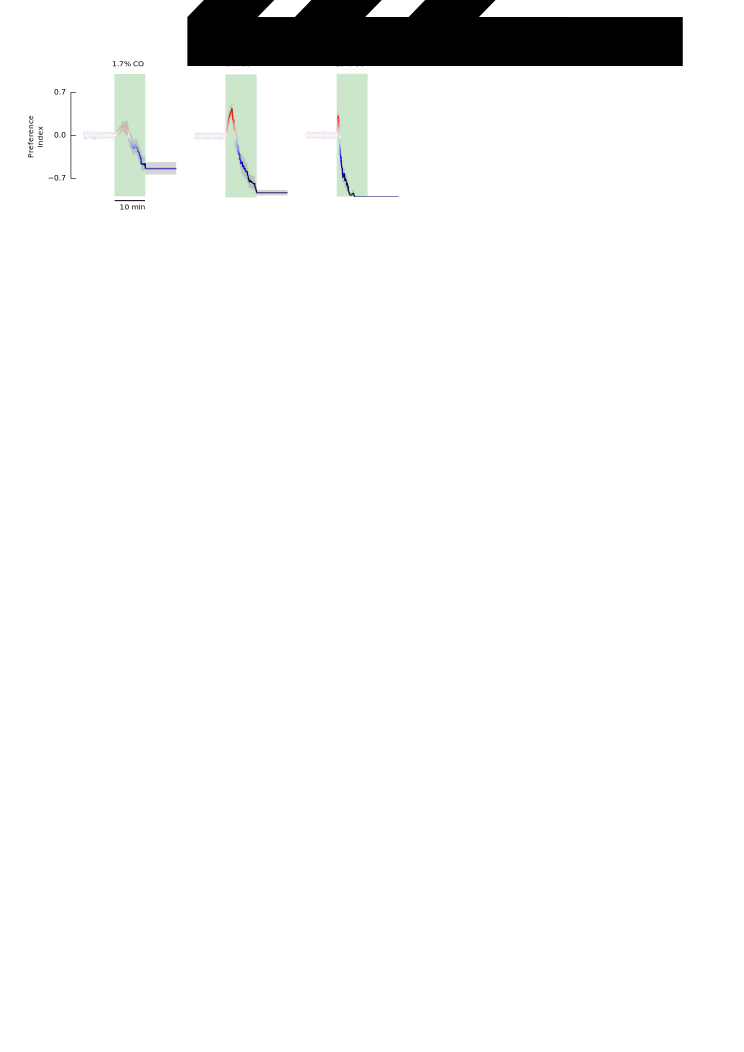

In [372]:
display(SVG('model.svg'))